In [1]:
print 'hello'

hello


In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split



df = pd.read_csv('wine.csv', sep = ';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y)


regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
print 'R-squared', regressor.score(X_test,y_test)




R-squared 0.320639530846


32% of the variance in the test set is explained by the model


In [3]:
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('wine.csv', sep = ';')
X = df[list(df.columns)[:-1]]
y = df['quality']

regressor = LinearRegression()
scores = cross_val_score(regressor, X,y,cv=5 )
print scores.mean(), scores


0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


5 times cross-validation. mean value is 29% This suggest this is a bettter value to use than 32%. 

# Bag-of-words

In [4]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'   
    
]

8 unique words, this is the vocabulary. each  word isgiven a binary value.

UNC is the first element and present in the first document = 1

game is not present in the first document so = 0



In [6]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'      
]

vectorizer = CountVectorizer()
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_


[[1 1 0 1 0 1 0 1]
 [1 1 1 0 1 0 1 0]]
{u'duke': 1, u'basketball': 0, u'lost': 4, u'played': 5, u'game': 2, u'unc': 7, u'in': 3, u'the': 6}


top row of binary, 1 or 0 for unquie words. prder respesented by number after words.

same with bottom row, compaire each unquie word with word in that document.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game' ,
    'I ate a Sandwich'
]

vectorizer = CountVectorizer()
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_


[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]
{u'duke': 2, u'basketball': 1, u'lost': 5, u'played': 6, u'in': 4, u'game': 3, u'sandwich': 7, u'unc': 9, u'ate': 0, u'the': 8}


now have ten unique words AND last document clearly has less in common than first two

In [20]:
from sklearn.metrics.pairwise import euclidean_distances
counts = [
     [0, 1, 1, 0, 1, 0, 1, 0, 0, 1],
     [0, 1, 1, 1, 0, 1, 0, 0, 1, 0],
     [1, 0, 0, 0, 0, 0, 0, 1, 0 ,0]       
]

print 'Distance between 1st and 2nd documents:', euclidean_distances(counts[0], counts[1])
print 'Distance between 1st and 3nd documents:', euclidean_distances(counts[0], counts[2])
print 'Distance between 2nd and 3rd documents:', euclidean_distances(counts[1], counts[2])


Distance between 1st and 2nd documents: [[ 2.44948974]]
Distance between 1st and 3nd documents: [[ 2.64575131]]
Distance between 2nd and 3rd documents: [[ 2.64575131]]


In this case the euclidean distance between first sentance and secound is less that between the third and either of the other two sentances. This shows, emprically, that the third sentance is less like the first two.





In [22]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game',
    'I ate a Sandwich'
]

vectorizer = CountVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{u'duke': 2, u'basketball': 1, u'lost': 4, u'played': 5, u'game': 3, u'sandwich': 6, u'unc': 7, u'ate': 0}


stop_words='english' removes words such as 'a' and 'the' as well as some verbs, 'do','will'  etc. these are not considered important in terms of sentace meaning. We now have 8 elements in the arrays, not ten. Making comparision eaisier.

## Stemming and Lemmatization


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'He ate the sandwich',
    'Every sandwich was eaten by him',
 
]

vectorizer = CountVectorizer(binary = True, stop_words='english')
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_



In [10]:

from nltk import word_tokenize
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

wordnet_tags = ['n','v']

corpus = [
    'He ate the sandwich',
    'Every sandwich was eaten by him',
 
]


stemmer = PorterStemmer()

print 'Stemmed:', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus]
def lemmatize(token, tag):
    if tag[0].lower() in ['n','v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token
lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]

print 'Lemmatized:', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus]

 Stemmed: [[u'He', u'ate', u'the', u'sandwich'], [u'Everi', u'sandwich', u'wa', u'eaten', u'by', u'him']]
Lemmatized: [['He', u'eat', 'the', 'sandwich'], ['Every', 'sandwich', u'be', u'eat', 'by', 'him']]


import nltk
nltk.download()

"Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma ."

"A stemmer for English, for example, should identify the string "cats" (and possibly "catlike", "catty" etc.) as based on the root "cat", and "stems", "stemmer", "stemming", "stemmed" as based on "stem". A stemming algorithm reduces the words "fishing", "fished", and "fisher" to the root word, "fish"."


To come back too.


### hashing trick.

In [11]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = ['the', 'ate', 'bacon', 'cat']
vectorizer = HashingVectorizer(n_features=6)
print vectorizer.transform(corpus).todense()



[[-1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0.  0.]]


This does not require a iniail pass over the corpus, can allow for large corpus to be checked

## Features from images

Digit: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
Feature vector:
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


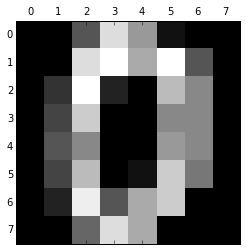

In [14]:
%matplotlib inline

from sklearn import datasets
digits = datasets.load_digits()
print 'Digit:', digits.target[0]
print digits.images[0]
print 'Feature vector:\n', digits.images[0].reshape(-1, 64)
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0])
pl.show()



Recording the intencity of all pixels can cause a huge matiric, to overcome this we can extract only points of intrest.

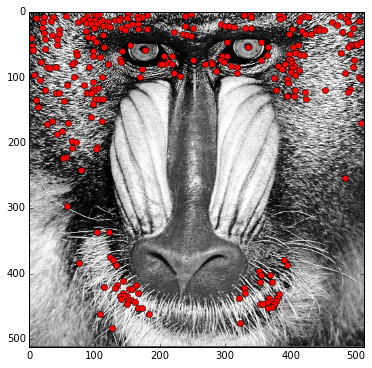

In [38]:
import numpy as nps
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.exposure import equalize_hist

def show_corners(corners,image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape [0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches())*1.5)
    plt.show()
    
mandrill = io.imread('Mandrill.jpg')
mandrill = equalize_hist(rgb2gray(mandrill))
corners = corner_peaks(corner_harris(mandrill), min_distance=2)
show_corners(corners, mandrill)

    

cut down number of pixels

## SIFT and SURF

Scale-Invariant Feature Transform (SIFT) and Speeded-Up Robust Features (SURF)

In [40]:
import mahotas as mh
from mahotas.features import surf


image = mh.imread('Mandrill.jpg', as_grey=True)
print 'The first SURF descriptor:\n', surf.surf(image)[0]
print 'Extracted %s SURF descriptors' % len(surf.surf(image))



The first SURF descriptor:
[  4.46235229e+02   3.69880566e+02   2.04357562e+00   3.93499285e+02
   1.00000000e+00  -1.11502961e+00   1.51135616e-03   9.54039202e-04
   3.35016386e-03   1.74577533e-03  -1.17946262e-05  -1.33784963e-02
   4.71732685e-02   2.33545348e-02  -4.56612801e-03  -6.63515645e-03
   2.17874461e-02   1.98620606e-02  -1.07532854e-03  -2.01363389e-03
   2.34755127e-03   4.38432145e-03  -2.99622668e-03  -1.49769693e-03
   2.78870332e-02   1.33202425e-02   1.54127981e-01   2.25119464e-02
   3.35848498e-01   1.74933762e-01   2.33728883e-01  -5.08479123e-02
   2.89558522e-01   2.42753913e-01   2.94917050e-02  -1.04171128e-02
   5.15541156e-02   3.05821327e-02  -1.05069163e-02   4.14891276e-03
   3.51744806e-02   1.74992192e-02  -1.49965004e-01   5.91733416e-02
   3.94021382e-01   2.08290317e-01  -1.88889608e-01  -1.21117985e-01
   4.64379914e-01   3.29348119e-01   3.46412260e-03   1.02296776e-03
   7.38688425e-02   4.19854087e-02   2.55939223e-03   1.96841018e-03
   3.81

SIFT looks as mutitude of areas and is less sensitive to scale, rotation and illumination of a image. It also takes infor from surrounign area 

SURF is faster and also insenstive to scale, rotation and illumination of a image.

## Scale

In [41]:
from sklearn import preprocessing
import numpy as np
X = np.array([
            [0,0,5,13,9,1],
            [0,0,13,15,10,15],
            [0,3,15,2,0,11]
        ])

print preprocessing.scale(X)

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]


C:\Python27\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


To come back too

# Logistic Regression

We can use a logitisitc function:    
    

In [66]:
from IPython.display import display, Math, Latex
display(Math(r' F(t) = \frac{1}{1 + e^{-t}}'))

<IPython.core.display.Math object>

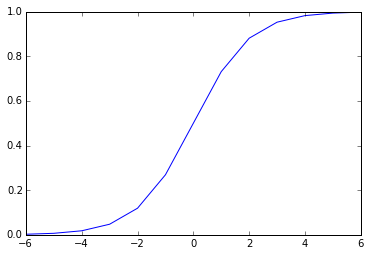

In [114]:
import math
import matplotlib.pyplot as plt


yarray = []

for i in range(-6,7):
    y = 1/(1+ math.exp(-i))
    yarray.append(y)
    
plt.plot(range(-6,7) , yarray)

## Spam!

In [69]:
import pandas as pd
df = pd.read_csv('SMSSpamCollection.csv', delimiter = '\t', header = None)
print df.head()

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [71]:
print 'Number of Spam Messages', df[df[0] == 'spam'][0].count()

 Number of Spam Messages 747


In [72]:
print 'Number of Ham Messages', df[df[0] == 'ham'][0].count()

Number of Ham Messages 4825


In [107]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

df = pd.read_csv('SMSSpamCollection.csv', delimiter = '\t', header = None)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1],df[0])

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)




True positive would detect message as Spam
True negative would detect message as Ham

False positive would detect Ham as Spam
False negative would detect Spam as Ham

we can use a confusion matric to visualize true and false poitives and negatives. 

[[4 1]
 [2 3]]


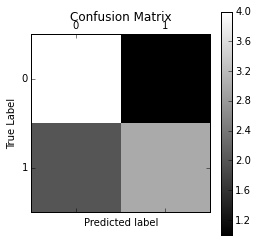

In [112]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel ('True Label')
plt.xlabel ('Predicted label')
plt.show()


Four true negatives, three true positives, two false negatves and one false positive.


Come back too

## What about Accuracy?!

In [116]:
from sklearn.metrics import accuracy_score
y_pred, y_true = [0,1,1,0], [1,1,1,1]
print 'Accuracy' , accuracy_score(y_true, y_pred)

Accuracy 0.5


We can use LogisticRegression.score() 

0.953816577372 [ 0.94736842  0.95454545  0.95574163  0.95813397  0.95329341]


(0.9, 1)

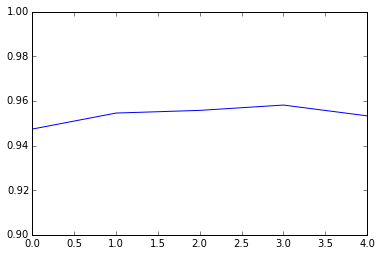

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

df = pd.read_csv('SMSSpamCollection.csv', delimiter = '\t', header = None)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1],df[0])

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print np.mean(scores), scores




plt.plot(scores)

plt.ylim(plt.ylim(0.9,1))



5 random tests, so accuracy changes
insensitive to false +ve and -ve

To change this, we employ precision and recall


## Precision and recall

In [157]:
import numpy as np
import pandas as pd


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score


df = pd.read_csv('SMSSpamCollection.csv', delimiter = '\t')


X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'])


vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)





KeyError: 'message'